In [1]:
# cnn model
import pandas as pd
import numpy as np
import time
from numpy import mean
from numpy import std
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
#plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef,classification_report,roc_curve
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from keras.utils import np_utils


C:\Users\lovey\Anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
Using TensorFlow backend.
C:\Users\lovey\Anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\lovey\Anaconda3\envs\tensorflow_env\lib\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a f

In [2]:
# Read the data in the CSV file using pandas
df = pd.read_csv('Nigerian Songs Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   chroma_stft         1000 non-null   float64
 1   spectral_centroid   1000 non-null   float64
 2   spectral_bandwidth  1000 non-null   float64
 3   spectral_rolloff    1000 non-null   float64
 4   rmse                1000 non-null   float64
 5   zero_crossing_rate  1000 non-null   float64
 6   mfcc                1000 non-null   float64
 7   Genre               1000 non-null   object 
dtypes: float64(7), object(1)
memory usage: 62.6+ KB


In [15]:
df.head()

,chroma_stft,spectral_centroid,spectral_bandwidth,spectral_rolloff,rmse,zero_crossing_rate,mfcc,Genre
0,0.450630,3295.793673,2743.706610,6634.178537,0.207058,0.159198,3.533837,2
1,0.404949,3098.680171,2657.159691,6268.231018,0.171187,0.140668,1.997059,2
2,0.375807,3291.535269,2704.093204,6582.373880,0.232083,0.154717,2.690791,2
3,0.394169,3099.266253,2576.294036,6173.725535,0.183785,0.157641,1.266843,2
4,0.408717,3305.515165,2722.979959,6596.260651,0.226707,0.155968,2.114989,2


In [16]:
df.shape

(1000, 8)

In [17]:
df.describe()

,chroma_stft,spectral_centroid,spectral_bandwidth,spectral_rolloff,rmse,zero_crossing_rate,mfcc,Genre
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.391999,1841.754989,1810.306080,3766.548111,0.200434,0.082146,0.384720,1.500000
std,0.051404,777.685095,697.693309,1552.389725,0.088632,0.048922,4.487318,1.118593
min,0.264202,670.650872,834.241135,1322.312900,0.043007,0.012856,-12.985394,0.000000
25%,0.353772,1104.824244,1135.767640,2388.793496,0.128420,0.051247,-3.718355,0.750000
50%,0.385110,1706.871642,1843.440693,3361.380363,0.182177,0.067121,1.082012,1.500000
75%,0.423697,2465.426486,2456.943311,5075.965619,0.279119,0.093214,4.324037,2.250000
max,0.565926,3744.628926,3374.810795,7672.910306,0.408179,0.322575,8.762769,3.000000


In [18]:
All = df.shape[0]
Fuji = df[df['Genre'] == 'Fuji']
Afro = df[df['Genre'] == 'Afro']
Apala =df[df['Genre'] == 'Apala']
Juju = df[df['Genre'] == 'Juju']

a = len(Fuji)/All
b = len(Afro)/All
c = len(Apala)/All
d = len(Juju)/All

print('Fuji:' ,a*100, '%')
print('Afro:' ,b*100, '%')
print('Apala:',c*100, '%')
print('Juju:' ,d*100, '%')

Fuji: 0.0 %
Afro: 0.0 %
Apala: 0.0 %
Juju: 0.0 %


C:\Users\lovey\Anaconda3\envs\tensorflow_env\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Text(0, 0.5, 'Frequency')

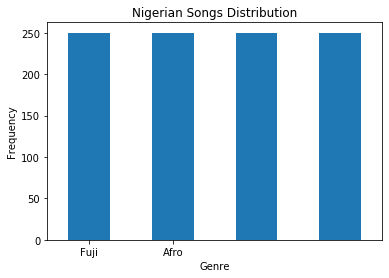

In [19]:
# Let's plot the Transaction class against the Frequency
labels = ['Fuji','Afro','Apala','Juju']
classes = pd.value_counts(df['Genre'], sort = True)
classes.plot(kind = 'bar', rot=0)
plt.title("Nigerian Songs Distribution")
plt.xticks(range(2), labels)
plt.xlabel("Genre")
plt.ylabel("Frequency")

In [20]:
from sklearn.preprocessing import LabelEncoder
# Import label encoder 
from sklearn import preprocessing 
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'Genre'. 
df['Genre']= label_encoder.fit_transform(df['Genre']) 

TARGET_COL = df['Genre'].unique() 
TARGET_COL[0]

2

In [21]:
#define features
features = df.drop(["Genre"], axis=1)

#define labels
labels = df["Genre"]

#Import the standard scaler
from sklearn.preprocessing import StandardScaler

#Scale the features and set the values to a new variable
#scaler = StandardScaler() 
#scaled_train_features = scaler.fit_transform(features)
labels

0      2
1      2
2      2
3      2
4      2
      ..
995    3
996    3
997    3
998    3
999    3
Name: Genre, Length: 1000, dtype: int64

In [22]:
X = df[['chroma_stft', 'spectral_centroid', 'spectral_bandwidth', 'spectral_rolloff', 'rmse', 'zero_crossing_rate', 'mfcc']]

In [23]:
X.head()

,chroma_stft,spectral_centroid,spectral_bandwidth,spectral_rolloff,rmse,zero_crossing_rate,mfcc
0,0.450630,3295.793673,2743.706610,6634.178537,0.207058,0.159198,3.533837
1,0.404949,3098.680171,2657.159691,6268.231018,0.171187,0.140668,1.997059
2,0.375807,3291.535269,2704.093204,6582.373880,0.232083,0.154717,2.690791
3,0.394169,3099.266253,2576.294036,6173.725535,0.183785,0.157641,1.266843
4,0.408717,3305.515165,2722.979959,6596.260651,0.226707,0.155968,2.114989


In [24]:
y=df['Genre']
y

0      2
1      2
2      2
3      2
4      2
      ..
995    3
996    3
997    3
998    3
999    3
Name: Genre, Length: 1000, dtype: int64

In [25]:
#Scale each feature dimension to be in the range -1 to 1:
import numpy, scipy, matplotlib.pyplot as plt, sklearn, urllib, IPython.display as ipd
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
training_features = scaler.fit_transform(features)
print(training_features.min(axis=0))
print(training_features.max(axis=0))

[-1. -1. -1. -1. -1. -1. -1.]
[1. 1. 1. 1. 1. 1. 1.]


In [26]:
training_features[0]
#training_features[200:,1],

array([ 0.23575542,  0.70797758,  0.503179  ,  0.67287116, -0.10151449,
       -0.05500299,  0.51913805])

In [545]:
from sklearn.model_selection import train_test_split

In [546]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [547]:
X_train.shape

(800, 7)

In [548]:
X_train = X_train.values

In [549]:
y_train.shape

(800,)

In [550]:
y_train = y_train.values

In [551]:
X_y = X_train.reshape(1,X_train.shape[0], X_train.shape[1])

In [552]:
X_y.shape

(1, 800, 7)

In [553]:
print(X_y)

[[[ 3.80678802e-01  2.17010864e+03  2.53569892e+03 ...  1.93901210e-01
    7.91151680e-02  3.07870579e+00]
  [ 3.86949087e-01  2.82803323e+03  2.38115098e+03 ...  2.16680150e-01
    1.42343382e-01  2.79066660e+00]
  [ 3.62045079e-01  3.32893787e+03  2.16219032e+03 ...  1.77997620e-01
    2.07950522e-01 -4.89167286e+00]
  ...
  [ 3.79372689e-01  1.37881076e+03  1.06347820e+03 ...  2.11488830e-01
    2.34473695e-01 -4.60411390e+00]
  [ 4.47984589e-01  2.41473189e+03  2.22867974e+03 ...  2.48044330e-01
    6.89523290e-02  4.68347744e+00]
  [ 3.70560618e-01  1.14976511e+03  1.20718669e+03 ...  1.20730460e-01
    5.69348310e-02 -1.58875509e+00]]]


In [554]:
y_t = y_train.reshape(y_train.shape[0],1)

In [555]:
y_t.shape

(800, 1)

In [556]:
print(y_t)

[[0]
 [2]
 [1]
 [0]
 [3]
 [3]
 [3]
 [2]
 [2]
 [2]
 [2]
 [3]
 [3]
 [0]
 [2]
 [2]
 [1]
 [0]
 [0]
 [3]
 [1]
 [0]
 [2]
 [3]
 [3]
 [2]
 [0]
 [2]
 [2]
 [3]
 [3]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [2]
 [0]
 [1]
 [2]
 [2]
 [2]
 [0]
 [3]
 [0]
 [3]
 [2]
 [0]
 [3]
 [2]
 [2]
 [2]
 [1]
 [1]
 [3]
 [1]
 [2]
 [0]
 [2]
 [0]
 [2]
 [3]
 [3]
 [0]
 [3]
 [0]
 [2]
 [2]
 [1]
 [3]
 [1]
 [1]
 [2]
 [3]
 [3]
 [1]
 [1]
 [3]
 [3]
 [1]
 [1]
 [0]
 [3]
 [0]
 [0]
 [2]
 [0]
 [2]
 [1]
 [1]
 [2]
 [1]
 [3]
 [3]
 [1]
 [3]
 [0]
 [0]
 [0]
 [2]
 [0]
 [1]
 [3]
 [3]
 [1]
 [2]
 [0]
 [2]
 [2]
 [1]
 [2]
 [3]
 [3]
 [0]
 [3]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [2]
 [2]
 [3]
 [3]
 [1]
 [1]
 [3]
 [0]
 [2]
 [1]
 [2]
 [3]
 [2]
 [0]
 [3]
 [1]
 [0]
 [3]
 [0]
 [3]
 [0]
 [1]
 [0]
 [1]
 [3]
 [1]
 [2]
 [0]
 [3]
 [2]
 [3]
 [0]
 [2]
 [2]
 [3]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [3]
 [0]
 [2]
 [1]
 [2]
 [3]
 [0]
 [2]
 [2]
 [0]
 [3]
 [1]
 [3]
 [3]
 [1]
 [3]
 [0]
 [3]
 [1]
 [2]
 [1]
 [2]
 [0]
 [1]
 [2]
 [2]
 [1]
 [2]
 [0]
 [3]
 [0]
 [3]
 [2]
 [3]
 [2]
 [3]


In [557]:
X_test.shape

(200, 7)

In [558]:
X_test = X_test.values


In [559]:
X_test = X_test.reshape(1,X_test.shape[0], X_test.shape[1]) #numpy.expand_dims(X_test, axis=-1) 

In [560]:
X_test.shape

(1, 200, 7)

In [568]:
print(len(X_y))

1


In [569]:
print(len(y_t))

800


In [570]:
len(X_y) == len(y_t)

False

In [564]:
# # fit and evaluate a model
# def evaluate_model(X_train, y_train, X_test, y_test):

#y_train_onehot = np_utils.to_categorical(y_train)
#y_test_onehot = np_utils.to_categorical(y_test)

verbose, epochs, batch_size = 0, 10, 32
#np.expand_dims(X_train, axis=1) 
n_timesteps, n_features =(X_train.shape[0], X_train.shape[1])

#print(n_timesteps)
#X_train = np.asarry(X_train)
#X_train = np.reshape(X_train,(800,(1,7))
#X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
                     
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(n_timesteps,n_features)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(4, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit network
model.fit(X_y, y_t, epochs=epochs, batch_size=batch_size, verbose=verbose)

#X = veriyeni1.values[:]
#Y = veriyeni2.values[:]   
#X = np.expand_dims(X, axis=2)
#Y = np.expand_dims(Y, axis=2)

#(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size=0.33, random_state=seed)
#print(X_train.shape)

# evaluate model
_, accuracy = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=0)
#return accuracy

ValueError: Input arrays should have the same number of samples as target arrays. Found 1 input samples and 800 target samples.

In [571]:
# summarize scores
def summarize_results(scores):
    print(scores)
    m, s = mean(scores), std(scores)
    print('Accuracy: %.3f%% (+/-%.3f)' % (m, s))

In [572]:
# run an experiment
def run_experiment(repeats=10):
    # load data
    X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    # repeat experiment
    scores = list()
    for r in range(repeats):
        score = evaluate_model(X_train, y_train, X_test, y_test)
        score = score * 100.0
        print('>#%d: %.3f' % (r+1, score))
        scores.append(score)
    # summarize results
    summarize_results(scores)

In [ ]:
# run the experiment
run_experiment()